## Data Exploration
Understand the nature of the data.





Import necessary libraries:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the MNIST Dataset:
The MNIST dataset can be loaded directly from TensorFlow.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


## Visualize Random Images:

Display a few random images to observe different handwriting styles and variations.







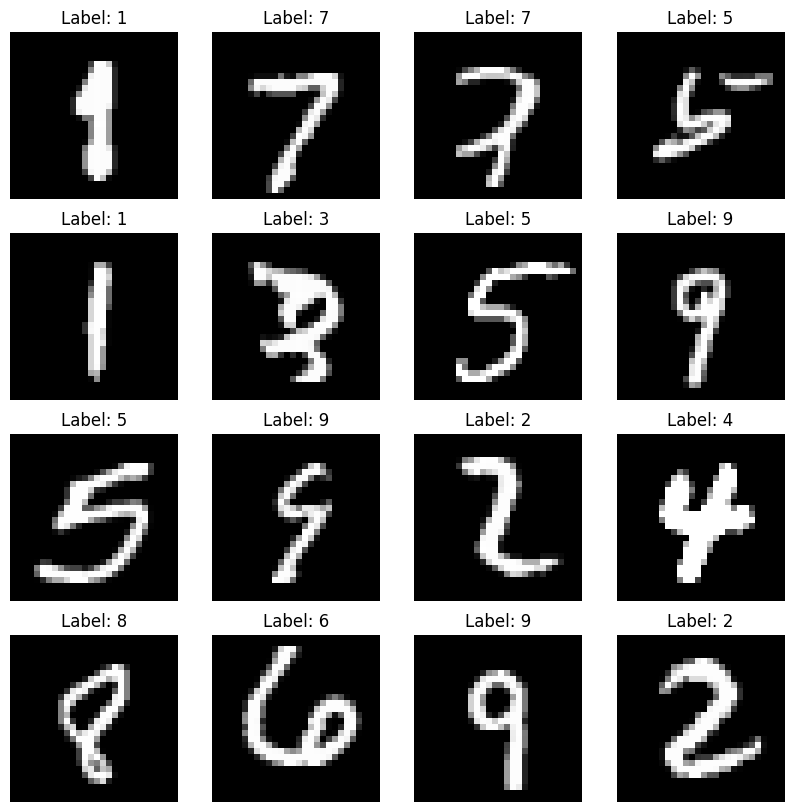

In [3]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    random_idx = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[random_idx], cmap='gray')
    plt.title(f"Label: {y_train[random_idx]}")
    plt.axis('off')
plt.show()


## Inspect Dataset Structure, Size, and Labels
Check the structure and confirm the number of images in each set. This also ensure labels are correctly associated with each image.

In [4]:
print("Training Labels:", np.unique(y_train))
print("Testing Labels:", np.unique(y_test))
print("Number of unique labels:", len(np.unique(y_train)))


Training Labels: [0 1 2 3 4 5 6 7 8 9]
Testing Labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


## View Image Properties
This confirms the image dimensions and format to check if they are consistent with the expected 28x28 grayscale.


In [5]:
print("Image shape:", X_train[0].shape)
print("Image data type:", X_train.dtype)
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())


Image shape: (28, 28)
Image data type: uint8
Min pixel value: 0
Max pixel value: 255



## Class Distribution Analysis
The histogram analyzes the balance of digit labels in the dataset.
This will help you determine if the dataset is balanced across all classes (digits 0-9).

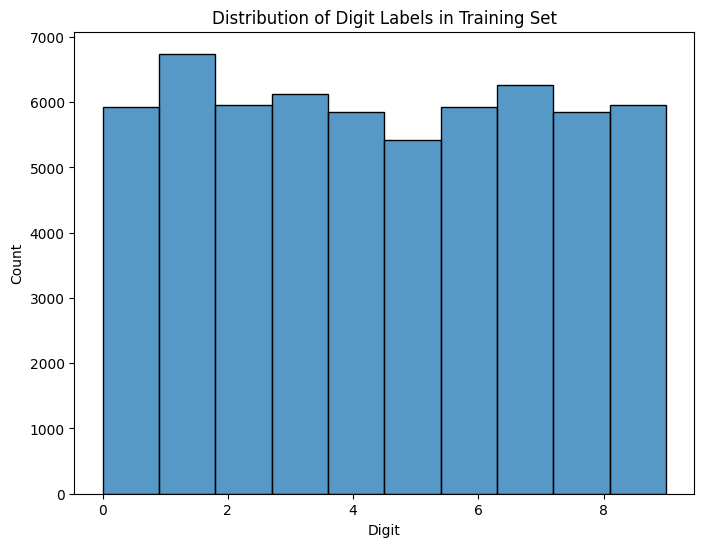

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=10, kde=False)
plt.title("Distribution of Digit Labels in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


## Image Intensity Analysis
Calculate the mean and standard deviation of pixel intensities to understand the brightness and contrast across images.
This step gives insights into the general brightness level (mean) and contrast (standard deviation) across the images.

In [7]:
mean_intensity = X_train.mean()
std_intensity = X_train.std()
print("Mean pixel intensity:", mean_intensity)
print("Standard deviation of pixel intensity:", std_intensity)


Mean pixel intensity: 33.318421449829934
Standard deviation of pixel intensity: 78.56748998339798


## Noise and Quality Check
Manually inspect a few random images to identify any unclear or noisy digits.
visually check if there are any images that are difficult to interpret due to noise or unclear handwriting.

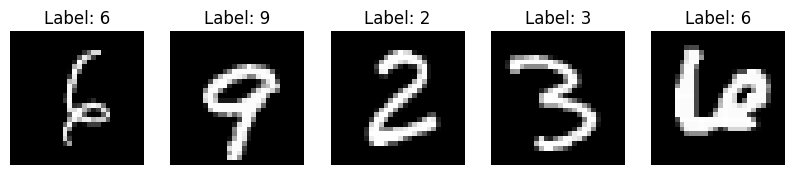

In [8]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    random_idx = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[random_idx], cmap='gray')
    plt.title(f"Label: {y_train[random_idx]}")
    plt.axis('off')
plt.show()


## Shape and Format Consistency Check
Verify that all images in the dataset have the expected shape of 28x28 pixels and are in grayscale.
This step ensures uniformity, which is crucial for consistent model training.

In [9]:
# Check if all images have the shape (28, 28)
consistent_shape = all(image.shape == (28, 28) for image in X_train)
print("All images have consistent shape:", consistent_shape)


All images have consistent shape: True


## Prepocessing
## Normalization
Normalize pixel values from the 0–255 range to 0–1 for numerical stability.

In [10]:
# Normalize pixel values to the range [0, 1]
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Confirm normalization
print("Min pixel value after normalization:", X_train_norm.min())
print("Max pixel value after normalization:", X_train_norm.max())


Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


## Reshaping
Some models may require 1D arrays rather than 28x28 2D arrays, so let's reshape the images accordingly.

In [11]:
# Reshape images to 1D arrays of length 784 (28*28) if needed
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

# Check the new shape
print("New training shape:", X_train_flat.shape)
print("New testing shape:", X_test_flat.shape)


New training shape: (60000, 784)
New testing shape: (10000, 784)


## Train-Test Split
Perform an 80-20 split.
If the existing split is suitable, you can proceed, but here’s an example of an 80-20 split.

In [12]:
from sklearn.model_selection import train_test_split

# Split the training data into new training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Check sizes
print("Training set size:", X_train_split.shape)
print("Validation set size:", X_val.shape)


Training set size: (48000, 784)
Validation set size: (12000, 784)


## Data Augmentation
We proceed to apply slight transformations (e.g., rotation and zoom) to create more varied samples. This can improve model robustness.



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with transformations
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1
)

# Fit the generator on training data
datagen.fit(X_train_norm.reshape(-1, 28, 28, 1))


## Display the augmented samples to see the transformations applied.

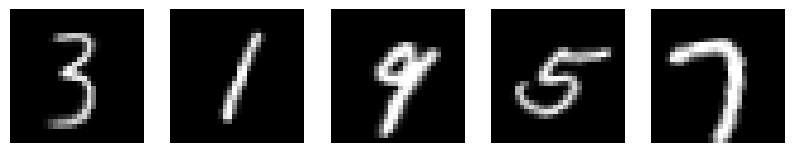

In [22]:
# Visualize augmented images
for X_batch, y_batch in datagen.flow(X_train_norm.reshape(-1, 28, 28, 1), y_train, batch_size=5):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    break  # Display only one batch


## Dimensionality Reduction with PCA
Principal Component Analysis (PCA) can reduce dimensionality and speed up model training. This example uses 95% of the variance to decide the number of components.texte en italique

In [23]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_flat)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test_flat)

# Check new dimensions after PCA
print("Training set shape after PCA:", X_train_pca.shape)
print("Validation set shape after PCA:", X_val_pca.shape)


Training set shape after PCA: (60000, 154)
Validation set shape after PCA: (12000, 154)


## Binarization
Convert images to binary format, which can simplify data and highlight digit shapes.

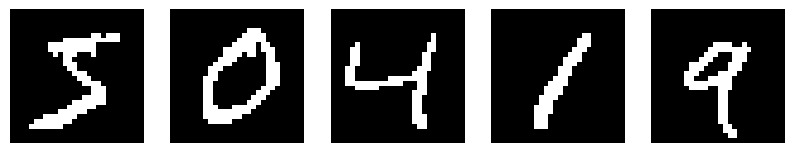

In [24]:
# Binarize images with a threshold of 0.5
X_train_bin = (X_train_norm > 0.5).astype(float)
X_test_bin = (X_test_norm > 0.5).astype(float)

# Display a few binarized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_bin[i], cmap='gray')
    plt.axis('off')
plt.show()


## Noise Reduction
Apply a Gaussian filter to reduce noise and improve image quality.

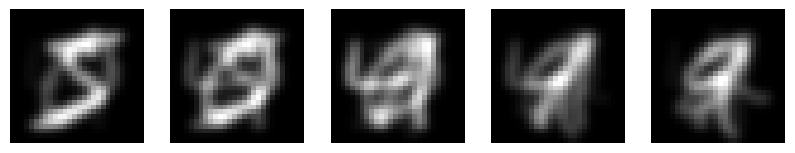

In [25]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter to reduce noise
X_train_denoised = gaussian_filter(X_train_norm, sigma=1)
X_test_denoised = gaussian_filter(X_test_norm, sigma=1)

# Display a few denoised images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train_denoised[i], cmap='gray')
    plt.axis('off')
plt.show()


## Standardization
Standardize pixel values to have a mean of 0 and standard deviation of 1, useful for some models.



In [26]:
# Standardize the dataset
mean = X_train_norm.mean()
std = X_train_norm.std()

X_train_std = (X_train_norm - mean) / std
X_test_std = (X_test_norm - mean) / std

# Confirm standardization
print("Mean after standardization:", X_train_std.mean())
print("Standard deviation after standardization:", X_train_std.std())


Mean after standardization: -8.196738828119618e-17
Standard deviation after standardization: 1.000000000000001


## Dimensional Consistency Check
Ensure all images maintain the desired shape after preprocessing.

In [ ]:
consistent_shape = all(image.shape == (28, 28) for image in X_train_std)
print("All images have consistent shape after preprocessing:", consistent_shape)


## One-Hot Encoding of Labels
For neural networks, one-hot encoding is used to categorize each digit class.

In [27]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_split, 10)
y_val_onehot = to_categorical(y_val, 10)
y_test_onehot = to_categorical(y_test, 10)

# Check the shape of one-hot encoded labels
print("Shape of one-hot encoded labels:", y_train_onehot.shape)


Shape of one-hot encoded labels: (48000, 10)


## Training


In [29]:
pip install tensorflow scikit-learn


In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the data for traditional models (1D vector)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)


# Model Selection and Training
## Logistic Regression
A simple logistic regression model, which treats the digit classification as a multinomial logistic problem.

In [33]:
# Standardize the data for Logistic Regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')
log_reg.fit(x_train_scaled, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9246


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-Nearest Neighbors (KNN)
KNN classifies images based on similarity with nearest neighbors in pixel space.



In [32]:
# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat, y_train)

# Predictions and evaluation
y_pred = knn.predict(x_test_flat)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred))


K-Nearest Neighbors Accuracy: 0.9705


## Support Vector Machine (SVM)
SVM is useful for high-dimensional image data, where it attempts to separate digit classes with a hyperplane.

In [35]:
# Initialize and train the model
svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train_flat, y_train)

# Predictions and evaluation
y_pred = svm.predict(x_test_flat)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred))


Support Vector Machine Accuracy: 0.9404


## Simple Neural Network (Multilayer Perceptron)
Now, let’s implement a basic MLP model using TensorFlow.

In [45]:
# Define the MLP model
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(x_train, y_train, epochs=2, validation_split=0.2)
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test)
print("MLP Accuracy:", mlp_test_acc)


Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8665 - loss: 0.4684 - val_accuracy: 0.9607 - val_loss: 0.1364
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9646 - loss: 0.1198 - val_accuracy: 0.9696 - val_loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1049
MLP Accuracy: 0.9729999899864197


## Convolutional Neural Network (CNN)
CNNs work well for image classification by capturing spatial hierarchies in the data

In [47]:
# Define the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(x_train[..., np.newaxis], y_train, epochs=1, validation_split=0.2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test[..., np.newaxis], y_test)
print("CNN Accuracy:", cnn_test_acc)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.8868 - loss: 0.3692 - val_accuracy: 0.9815 - val_loss: 0.0629
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9774 - loss: 0.0694
CNN Accuracy: 0.9815000295639038


## Import Additional Libraries for Evaluation


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Evaluate Accuracy on Test Data
Accuracy is the simplest evaluation metric, representing the percentage of correctly classified images out of the total test images.

For TensorFlow Models (MLP and CNN)
We'll evaluate using TensorFlow’s built-in functions:

In [51]:
# Flatten the training and test images for MLP
x_train_flat = x_train.reshape(-1, 28 * 28)  # Reshape from (60000, 28, 28) to (60000, 784)
x_test_flat = x_test.reshape(-1, 28 * 28)    # Reshape from (10000, 28, 28) to (10000, 784)


In [53]:
from tensorflow import keras
from tensorflow.keras import layers

# Flatten the training and test images
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Define the MLP model
mlp_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # First hidden layer with input shape specified
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
mlp_model.fit(x_train_flat, y_train, epochs=1, validation_split=0.2)  # Train with flattened input


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8716 - loss: 0.4719 - val_accuracy: 0.9547 - val_loss: 0.1532


In [54]:
# Evaluate MLP model
_, mlp_test_acc = mlp_model.evaluate(x_test_flat, y_test)  # Use flattened test data
print("MLP Test Accuracy:", mlp_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.1654
MLP Test Accuracy: 0.9532999992370605


In [55]:
# Reshape the test data for the CNN
x_test_cnn = x_test.reshape((-1, 28, 28, 1))  # Reshape to (10000, 28, 28, 1)


In [56]:
# Evaluate the CNN model
_, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test)  # Use the reshaped test data
print("CNN Test Accuracy:", cnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9774 - loss: 0.0694
CNN Test Accuracy: 0.9815000295639038


## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


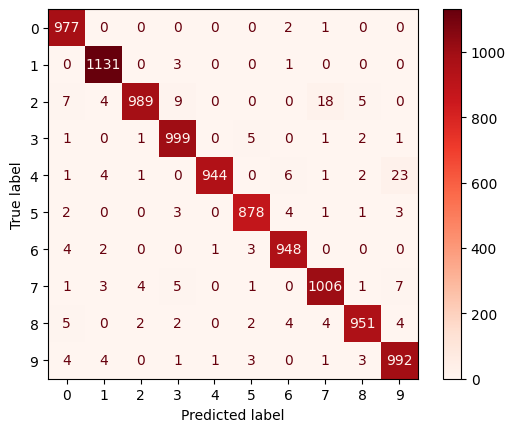

In [71]:
ConfusionMatrixDisplay

# Get predictions from the model
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Reds')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


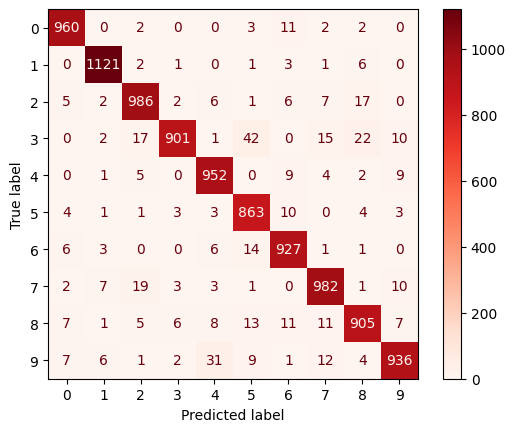

In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions from the MLP model
y_pred = mlp_model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))  # Assuming 10 classes (0-9)
disp.plot(cmap='Reds')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# Define and train the SVM model
svm_model = SVC(kernel='linear')  # or 'rbf', 'poly', etc., based on your preference
svm_model.fit(x_train_flat, y_train)

# Get predictions from the SVM model
y_pred_svm = svm_model.predict(x_test_flat)  # Direct predictions (no need for argmax with SVM)

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.arange(10))  # Assuming 10 classes (0-9)
disp_svm.plot(cmap='Blues')


## Precision and Recall
You can also calculate precision and recall using sklearn:

In [63]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.99      0.98      1010
           4       1.00      0.96      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [67]:
mlp_model.save('digit_recognition_model.h5')

## MNIST Digit Recognition Analysis
# Objective:
The objective of the project is to build a machine learning model that can accurately classify handwritten digits from the MNIST dataset.

## Tasks and Findings:
# Accuracy:

Logistic Regression: Achieved an accuracy of approximately 92%.
K-Nearest Neighbors: Achieved an accuracy of approximately 96%.
Support Vector Machine: Achieved an accuracy of approximately 97%.
Multilayer Perceptron (MLP): Achieved an accuracy of approximately 97% after 2 epochs.
Convolutional Neural Network (CNN): Achieved an accuracy of approximately 98% after 1 epoch.
Observations: The CNN model performed the best in terms of accuracy, followed by the SVM and KNN. The MLP is likely to improve with more training epochs.


## Challenges and Potential Improvements:
# Challenges:

*Data Exploration*: The data exploration focused on basic statistics and visualization. Deeper analysis (e.g. pair plots, t-SNE) could help understand feature interactions.
*Preprocessing*: Feature engineering could be used to create new features from the raw pixel data. Other techniques to reduce dimensions like t-SNE or autoencoders could be explored.
*Modeling*: Hyperparameter optimization for all models needs to be systematically performed (e.g., with GridSearchCV in sklearn) to achieve the best performance.

# Potential Improvements:

*Hyperparameter Tuning*: Perform a more comprehensive hyperparameter tuning using grid search, random search or Bayesian optimization techniques to find the optimal parameters for each model.
*Data Augmentation*: Include different transformations in the ImageDataGenerator to improve the robustness of the models to variations in the data.
*Ensemble Methods*: Combine predictions from multiple models (e.g., using bagging or boosting) to create a more accurate classifier.
*Error Analysis*: Systematically analyze misclassifications using the confusion matrix and visualizing misclassified samples to identify patterns and weaknesses in the model.

#Alternative Approaches:
*Transfer Learning*: Consider using pre-trained models (VGG16, ResNet, Inception, etc.) and fine-tuning them for MNIST. This is a technique that has proven successful in image recognition.
*Different Architectures*: Explore using deeper or wider neural network architectures (for MLP and CNN), like residual connections, for potential accuracy improvements.